<a href="https://colab.research.google.com/github/trangthuy38/Projects/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_Project_cu%E1%BB%91i_kh%C3%B3a_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import statistics
import imblearn
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("customer_churn_dataset-training-master.csv")

In [ ]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


Thông tin các cột
- Customer ID: Mã khách hàng
- Age: Tuổi
- Gender: Giới tính
- Tenure: Thời gian sử dụng
- Usage Frequency: Tần suất sử dụng
- Support Calls: Cuộc gọi hỗ trợ
- Payment Delay: Chậm thanh toán
- Subscription Type: Loại đăng ký
- Contract Length: Thời hạn hợp đồng
- Total Spend: Tổng chi tiêu
- Last Interaction: Tương tác lần cuối
- Churn: Khách hàng đã rời bỏ hay chưa

In [ ]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [ ]:
missing_rows = df[df.isnull().any(axis=1)]
missing_rows

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_duplicated = df[df.duplicated(keep=False)]
df_duplicated

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.reset_index(drop=True)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440827,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440828,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440829,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440830,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 43.7+ MB


In [ ]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
df[["Gender","Subscription Type","Contract Length"]] = df[["Gender","Subscription Type","Contract Length"]].apply(LabelEncoder().fit_transform)

In [ ]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.00,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.00,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.00,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.00,29.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,1,54.0,15.0,1.0,3.0,1,0,716.38,8.0,0.0
440829,449996.0,25.0,0,8.0,13.0,1.0,20.0,1,0,745.38,2.0,0.0
440830,449997.0,26.0,1,35.0,27.0,1.0,5.0,2,2,977.31,9.0,0.0
440831,449998.0,28.0,1,55.0,14.0,2.0,0.0,2,2,602.55,2.0,0.0


In [ ]:
df["Churn"].value_counts()

1.0    249999
0.0    190833
Name: Churn, dtype: int64

<Axes: ylabel='Churn'>

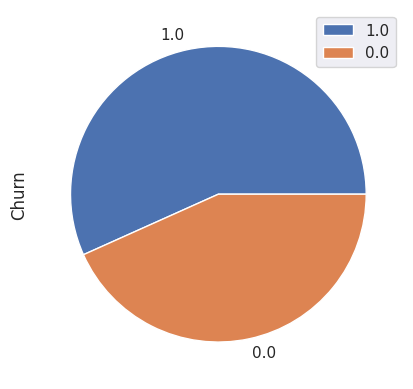

In [ ]:
df["Churn"].value_counts().plot.pie(legend=["0","1"])

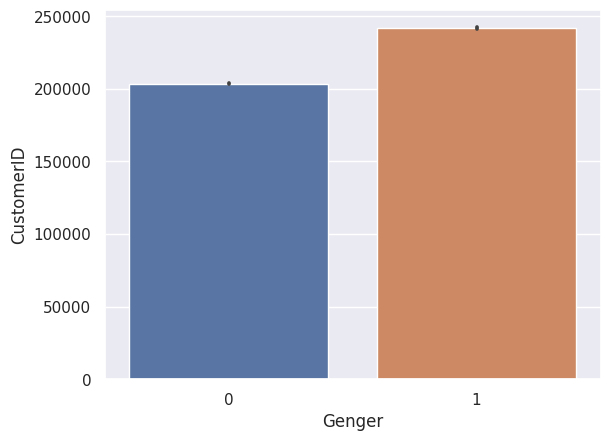

In [ ]:
sns.barplot(data=df, x="Gender", y="CustomerID")
plt.xlabel("Genger")
plt.ylabel("CustomerID")
plt.show()

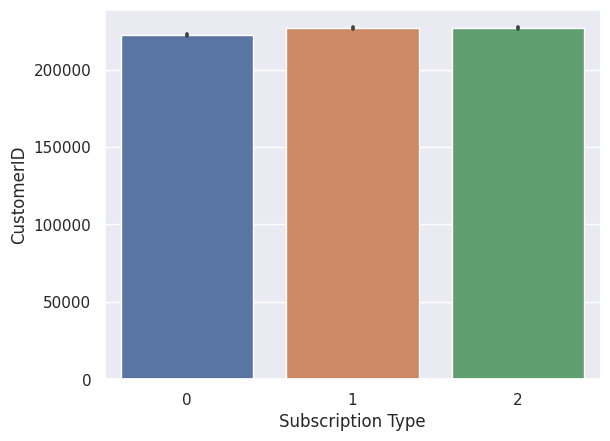

In [ ]:
sns.barplot(data=df, x="Subscription Type", y="CustomerID")
plt.xlabel("Subscription Type")
plt.ylabel("CustomerID")
plt.show()

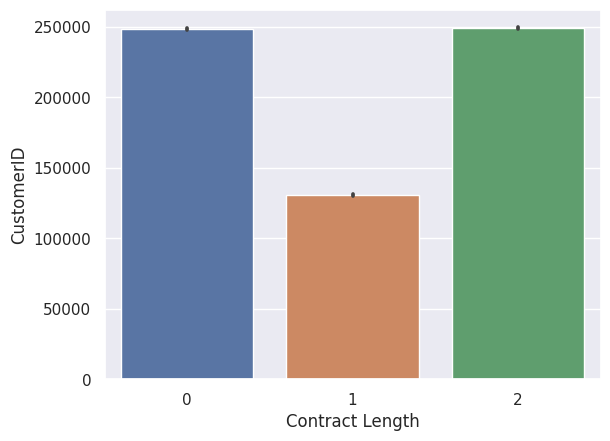

In [ ]:
sns.barplot(data=df, x="Contract Length", y="CustomerID")
plt.xlabel("Contract Length")
plt.ylabel("CustomerID")
plt.show()

Standard Deviation 12.442369490866625


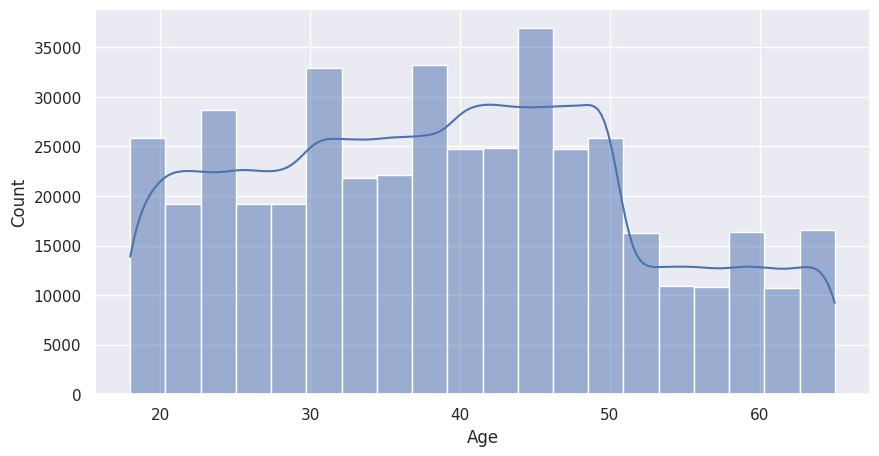

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x="Age", data=df, bins=20, kde=True)
print("Standard Deviation % s" % (statistics.stdev(df["Age"])))

Standard Deviation 17.255727385042206


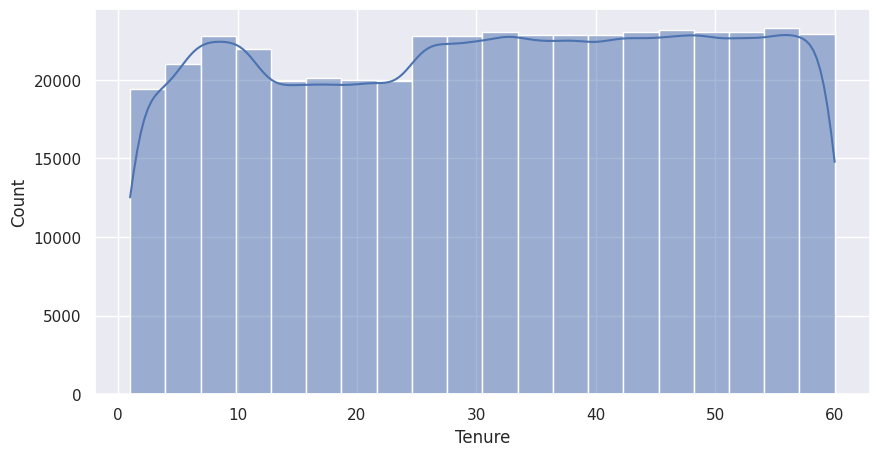

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x="Tenure", data=df, bins=20, kde=True)
print("Standard Deviation % s" % (statistics.stdev(df["Tenure"])))

Standard Deviation 3.070217877688797


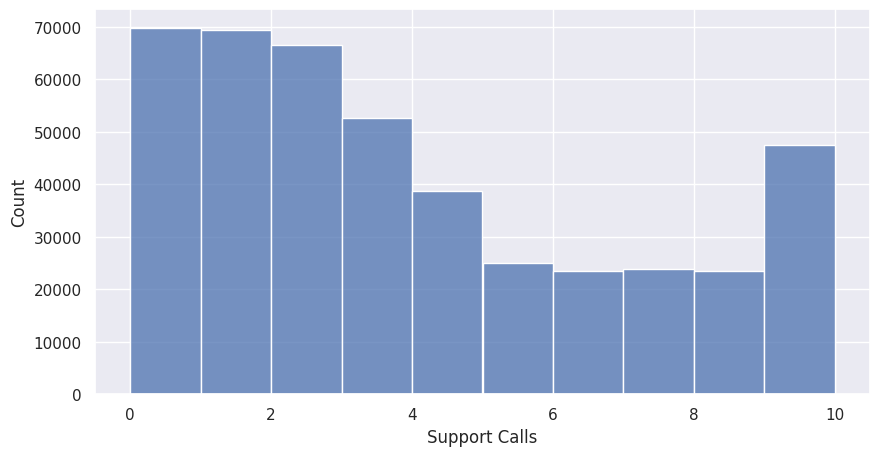

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x="Support Calls", data=df, bins=10)
print("Standard Deviation % s" % (statistics.stdev(df["Support Calls"])))

Standard Deviation 8.586241645186686


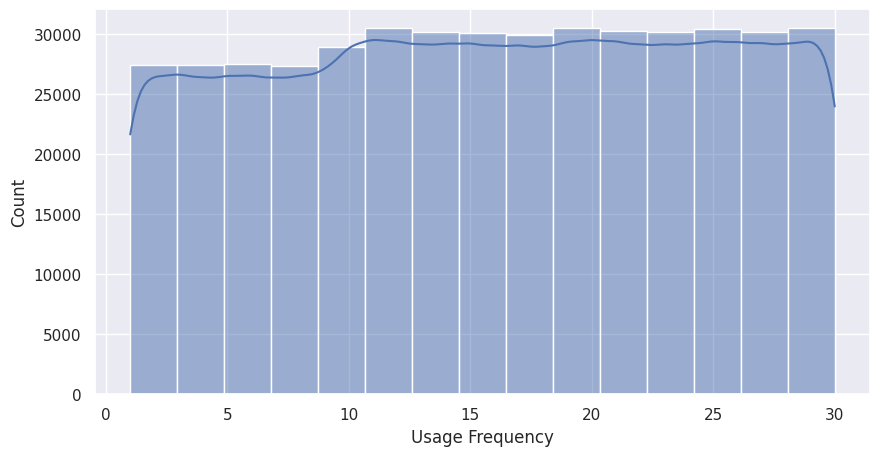

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x="Usage Frequency", data=df, bins=15, kde=True)
print("Standard Deviation % s" % (statistics.stdev(df["Usage Frequency"])))

Standard Deviation 8.258062517501818


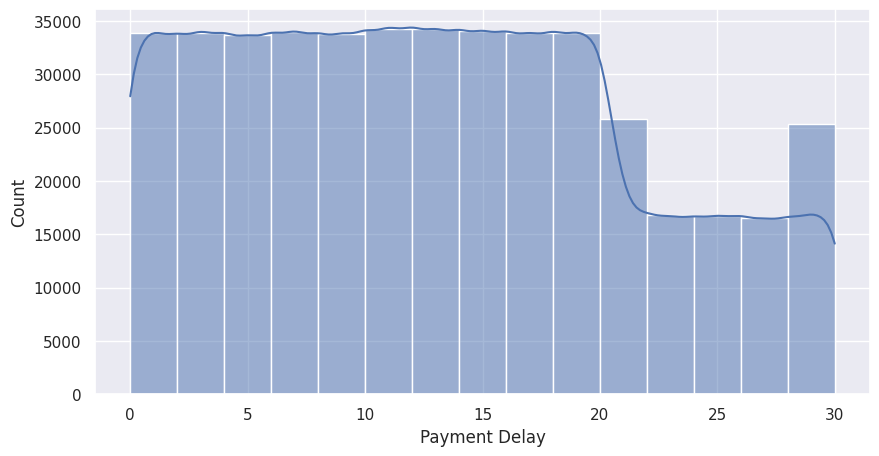

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x="Payment Delay", data=df, bins=15, kde=True)
print("Standard Deviation % s" % (statistics.stdev(df["Payment Delay"])))

Standard Deviation 240.8030011205686


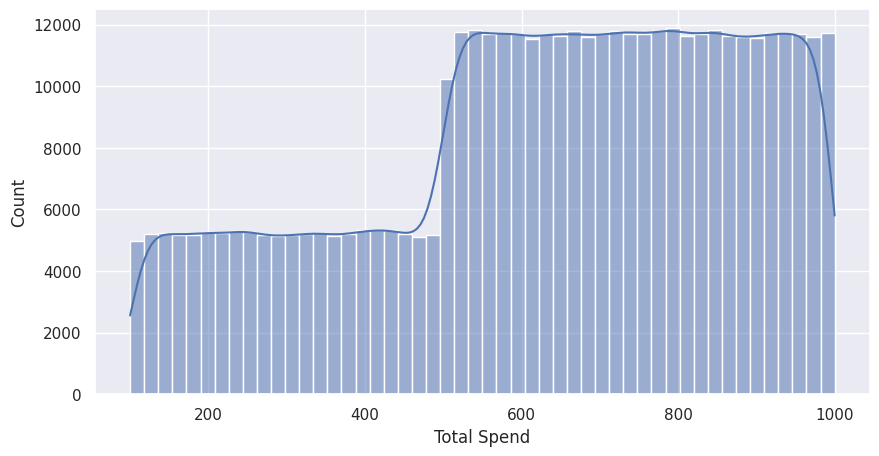

In [ ]:
plt.figure(figsize=(10,5)),
sns.histplot(x="Total Spend", data=df, bins=50, kde=True)
print("Standard Deviation % s" % (statistics.stdev(df["Total Spend"])))

Standard Deviation 8.59620768302461


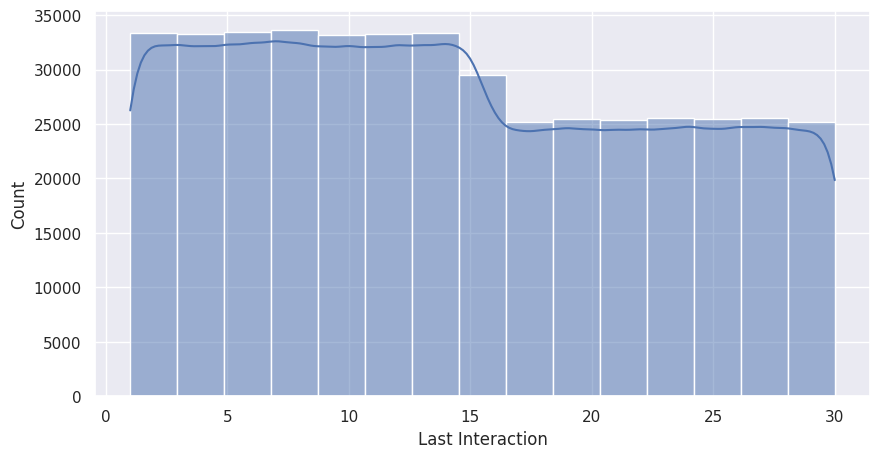

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x="Last Interaction", data=df, bins=15, kde=True)
print("Standard Deviation % s" % (statistics.stdev(df["Last Interaction"])))

In [ ]:
df = df.drop("CustomerID", axis=1)

<Axes: >

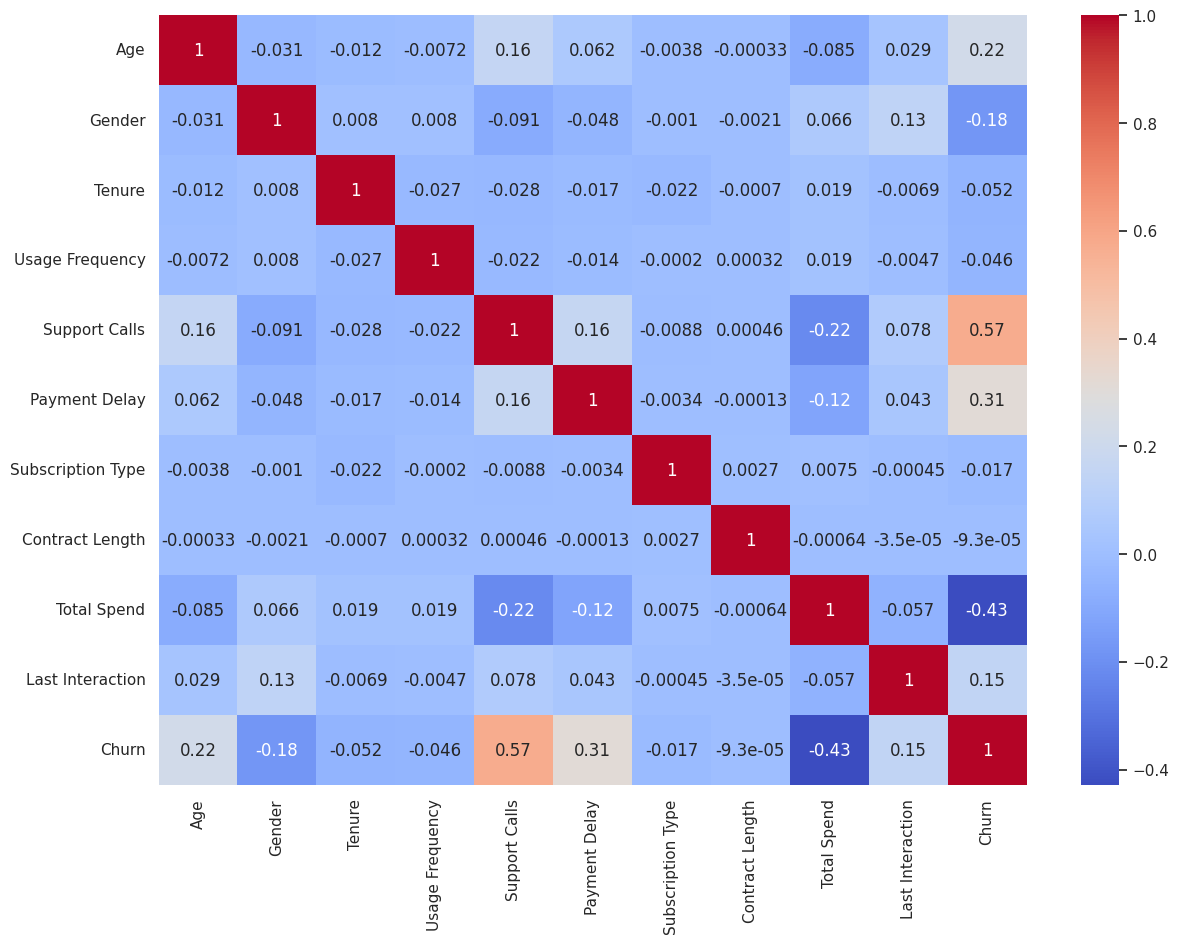

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
x = df.iloc[:,:-1].values
y = df["Churn"].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x_train.shape

(308582, 10)

In [ ]:
x_test.shape

(132250, 10)

In [ ]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(x_train,y_train)
y_pred = logis.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.8454215500945179


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82     57160
         1.0       0.87      0.85      0.86     75090

    accuracy                           0.85    132250
   macro avg       0.84      0.84      0.84    132250
weighted avg       0.85      0.85      0.85    132250



Text(0.5, 19.049999999999997, 'Du bao')

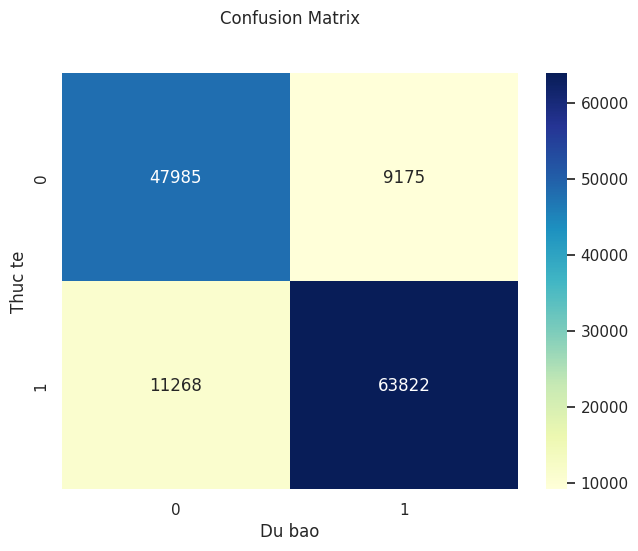

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred)
class_name = [0,1]
tick_mark = np.arange(len(class_name))
fig, ax = plt.subplots()
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Thuc te")
plt.xlabel("Du bao")

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train,y_train)
y_pred1 = GNB.predict(x_test)

In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred1))

Accuracy:  0.9090359168241966


In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     57160
         1.0       0.95      0.89      0.92     75090

    accuracy                           0.91    132250
   macro avg       0.91      0.91      0.91    132250
weighted avg       0.91      0.91      0.91    132250



Text(0.5, 19.049999999999997, 'Du bao')

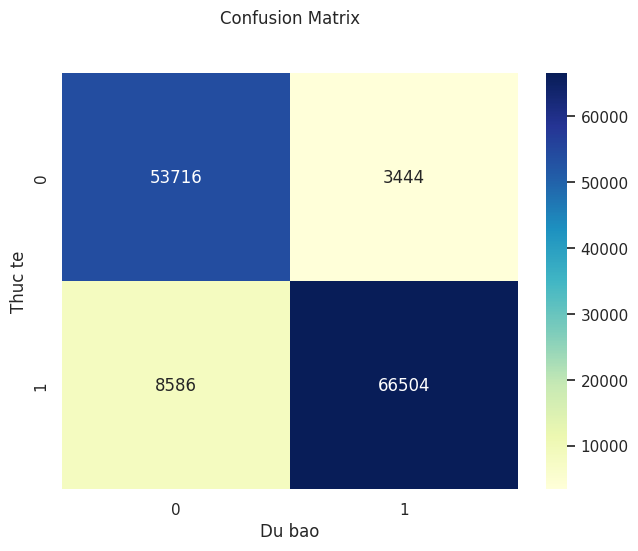

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred1)
class_name = [0,1]
tick_mark = np.arange(len(class_name))
fig, ax = plt.subplots()
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Thuc te")
plt.xlabel("Du bao")

In [ ]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred2 = DT.predict(x_test)

In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred2))

Accuracy:  0.9997429111531191


In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57160
         1.0       1.00      1.00      1.00     75090

    accuracy                           1.00    132250
   macro avg       1.00      1.00      1.00    132250
weighted avg       1.00      1.00      1.00    132250



Text(0.5, 19.049999999999997, 'Du bao')

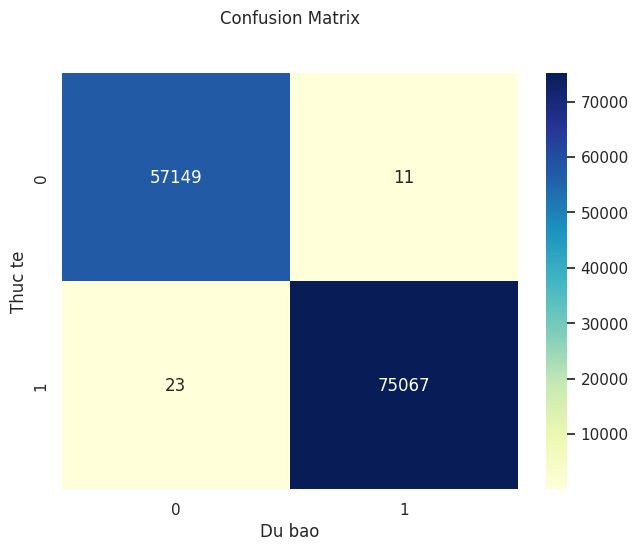

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred2)
class_name = [0,1]
tick_mark = np.arange(len(class_name))
fig, ax = plt.subplots()
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Thuc te")
plt.xlabel("Du bao")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=10)
RF.fit(x_train,y_train)
y_pred3 = RF.predict(x_test)

In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred3))

Accuracy:  0.9993345935727789


In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57160
         1.0       1.00      1.00      1.00     75090

    accuracy                           1.00    132250
   macro avg       1.00      1.00      1.00    132250
weighted avg       1.00      1.00      1.00    132250



Text(0.5, 19.049999999999997, 'Du bao')

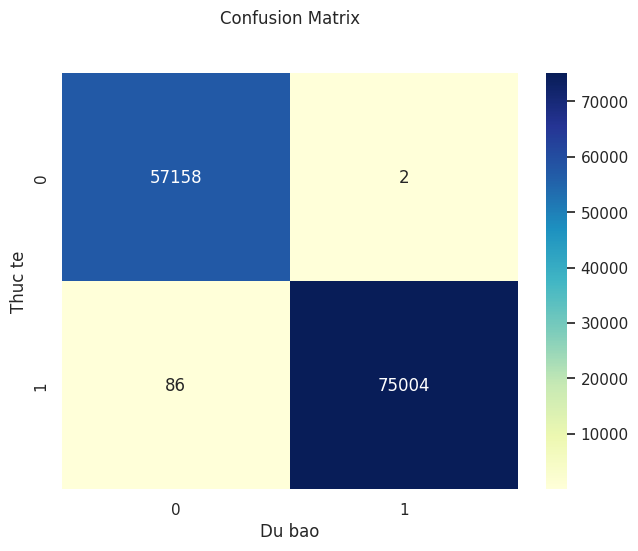

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred3)
class_name = [0,1]
tick_mark = np.arange(len(class_name))
fig, ax = plt.subplots()
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Thuc te")
plt.xlabel("Du bao")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)
y_pred4 = KNN.predict(x_test)

In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred4))

Accuracy:  0.888945179584121


In [ ]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88     57160
         1.0       0.97      0.83      0.89     75090

    accuracy                           0.89    132250
   macro avg       0.89      0.90      0.89    132250
weighted avg       0.90      0.89      0.89    132250



Text(0.5, 19.049999999999997, 'Du bao')

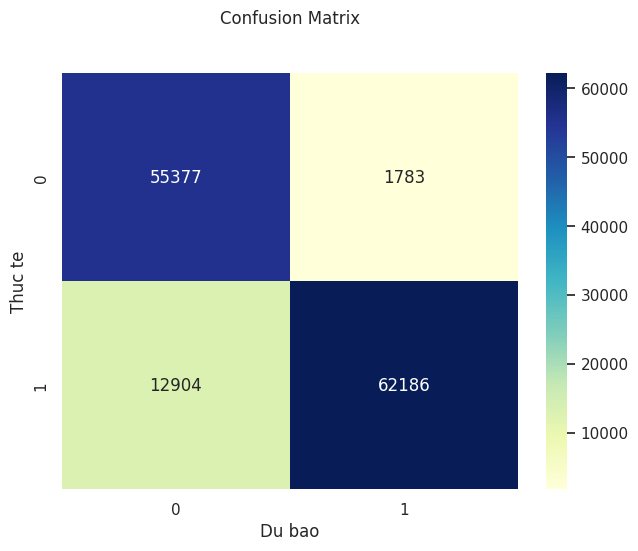

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred4)
class_name = [0,1]
tick_mark = np.arange(len(class_name))
fig, ax = plt.subplots()
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Thuc te")
plt.xlabel("Du bao")


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
bag = BaggingClassifier(LogisticRegression(),random_state=20)
bag.fit(x_train,y_train)
y_pred5 = bag.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred5))

Accuracy:  0.8496408317580341


In [ ]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83     57160
         1.0       0.88      0.85      0.87     75090

    accuracy                           0.85    132250
   macro avg       0.85      0.85      0.85    132250
weighted avg       0.85      0.85      0.85    132250



Text(0.5, 19.049999999999997, 'Du bao')

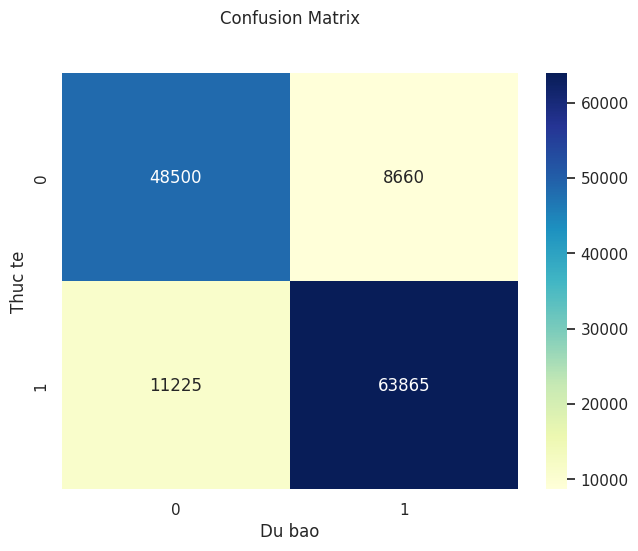

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred5)
class_name = [0,1]
tick_mark = np.arange(len(class_name))
fig, ax = plt.subplots()
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Thuc te")
plt.xlabel("Du bao")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
import datetime
models = [
    LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=10),
    KNeighborsClassifier(n_neighbors=5),
    BaggingClassifier(LogisticRegression(),random_state=20)
]
entries = []
for model in models:
  t1 = datetime.datetime.now()
  model_name = model.__class__.__name__
  model.fit(x_train,y_train)
  t2 = datetime.datetime.now()
  d = round((t2-t1).total_seconds(),2)
  score_train = model.score(x_train,y_train)
  score_test = model.score(x_test,y_test)
  abs_score = abs(score_train - score_test)
  entries.append([model_name, score_train, score_test, abs_score, d])
df = pd.DataFrame(entries, columns = ["model_name", "score_train", "score_test", "abs_score", "time"])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
df

,model_name,score_train,score_test,abs_score,time
0,LogisticRegression,0.845950,0.845422,0.000529,3.54
1,GaussianNB,0.909564,0.909036,0.000528,0.15
2,DecisionTreeClassifier,1.000000,0.999682,0.000318,1.14
3,RandomForestClassifier,0.999971,0.999130,0.000840,3.74
4,KNeighborsClassifier,0.922986,0.888945,0.034041,0.91
5,BaggingClassifier,0.850941,0.849641,0.001300,37.44


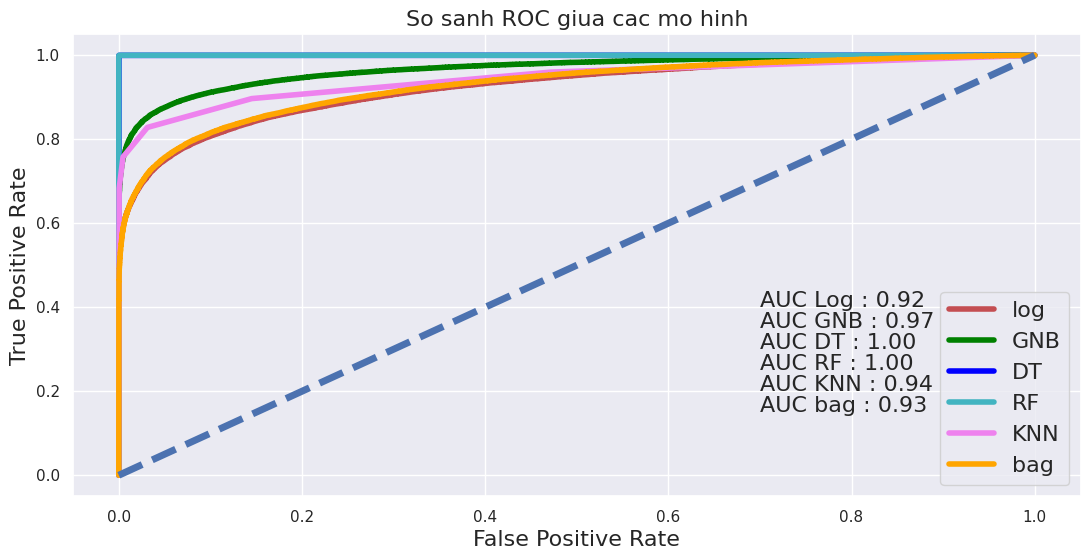

In [ ]:
#Ve ROC cua model LogisticRegression
plt.figure(figsize=(13,6))
y_probabilities = logis.predict_proba(x_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color="r")
plt.text(0.7,0.4,"AUC Log : {:.2f}".format(roc_auc_score(y_test,y_probabilities)),size=16)
#Ve ROC cua model GaussianNB
y_probabilities1 = GNB.predict_proba(x_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities1)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color="green")
plt.text(0.7,0.35,"AUC GNB : {:.2f}".format(roc_auc_score(y_test,y_probabilities1)),size=16)
#Ve ROC cua model DecisionTree
y_probabilities2 = DT.predict_proba(x_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities2)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color="blue")
plt.text(0.7,0.3,"AUC DT : {:.2f}".format(roc_auc_score(y_test,y_probabilities2)),size=16)
#Ve ROC cua model RandomForest
y_probabilities3 = RF.predict_proba(x_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities3)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color="#42b4c1")
plt.text(0.7,0.25,"AUC RF : {:.2f}".format(roc_auc_score(y_test,y_probabilities3)),size=16)
#Ve ROC cua model KNeighbors
y_probabilities4 = KNN.predict_proba(x_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities4)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color="violet")
plt.text(0.7,0.2,"AUC KNN : {:.2f}".format(roc_auc_score(y_test,y_probabilities4)),size=16)
#Ve ROC cua model BaggingClassifier
y_probabilities5 = bag.predict_proba(x_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities5)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color="orange")
plt.text(0.7,0.15,"AUC bag : {:.2f}".format(roc_auc_score(y_test,y_probabilities5)),size=16)
plt.plot([0,1],ls="--",linewidth=5)
plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)
plt.title("So sanh ROC giua cac mo hinh",fontsize=16)
plt.legend(["log","GNB","DT","RF","KNN","bag"],fontsize=16)